### 230528 하은서 필수과제2 
- 주가 예측해 보기 !
- 하나의 기업말고 두 개 이상으로 비교해 주세요, ex) 경쟁사, 동종기업, 보완재 등등 다양한 비교가능한 기업들의 주가를 비교 예측해 보는 것
- 실제 금융데이터를 기반으로 주가를 예측하고, 실제 값과 예측한 값이 얼마나 차이나는지를 확인해 보기 
- 투자했을 때 얻을 수 있는 수익까지 간단하게 계산해 보면서 시계열데이터 예측을 진행해 보자!

In [2]:
# import necessary libraries
import FinanceDataReader as fdr
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io
#to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

Importing plotly failed. Interactive plots will not work.


In [3]:
kr = fdr.StockListing('KRX')
kr

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,73000,1,300,0.41,73100,73400,72800,6636527,485231282000,435794126150000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,548000,1,1000,0.18,548000,561000,548000,106151,58968889000,128232000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,116500,1,2200,1.92,115200,117400,114500,2369009,273928504600,84812275522500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,752000,1,10000,1.35,741000,755000,741000,18337,13736896000,53522848000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,60600,1,100,0.17,60600,60700,60300,324068,19626943600,49866934020000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1599,2,-1,-0.06,1400,1599,1360,21,29199,2526356040,1579960,KNX
2724,288490,KR7288490006,나라소프트,KONEX,일반기업부,51,3,0,0.00,51,51,49,24921,1265483,1945497000,38147000,KNX
2725,322190,KR7322190000,베른,KONEX,일반기업부,176,1,22,14.29,176,176,154,3,506,1570834672,8925197,KNX
2726,000547,KR7000542001,흥국화재2우B,KOSPI,,9810,1,890,9.98,9900,10040,9200,23444,228152700,1506816000,153600,STK


#### 엔터테이먼트 주식 비교
- 하이브, SM

In [4]:
# 하이브 코드번호 확인 후 새로운 변수에 저장
kr.query('Name=="하이브"')
h = fdr.DataReader('352820')

h


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2023-06-23,307000,308500,297500,301000,246155,-0.019544
2023-06-26,299000,303500,296000,298000,125709,-0.009967
2023-06-27,298500,298500,285500,292000,289388,-0.020134


In [5]:
dic = { 'ds' : h.index,
       'y' : h.Close}

In [6]:
h_df = pd.DataFrame(dic)
h_df

,ds,y
Date,,
2020-10-15,2020-10-15,255420
2020-10-16,2020-10-16,198495
2020-10-19,2020-10-19,187110
2020-10-20,2020-10-20,180675
2020-10-21,2020-10-21,177210
...,...,...
2023-06-23,2023-06-23,301000
2023-06-26,2023-06-26,298000
2023-06-27,2023-06-27,292000


In [7]:
h_df.reset_index(inplace=True)

del h_df['Date']

In [8]:
h_df

,ds,y
0,2020-10-15,255420
1,2020-10-16,198495
2,2020-10-19,187110
3,2020-10-20,180675
4,2020-10-21,177210
...,...,...
665,2023-06-23,301000
666,2023-06-26,298000
667,2023-06-27,292000
668,2023-06-28,285000


<Axes: xlabel='ds'>

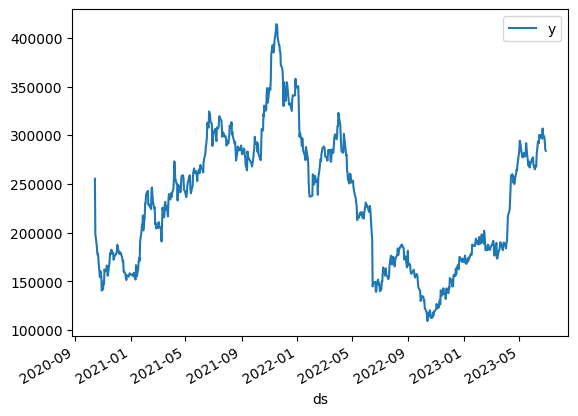

In [9]:
h_df.plot('ds')

- 2023년 4월부터 우상향하는 경향을 보인다

In [95]:
# SM 코드번호 확인 후 새로운 변수에 저장
kr.query('Name=="에스엠"')

s = fdr.DataReader('041510')

s


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-04-27,5326,5326,5326,5325,49,NaN
2000-04-28,5961,5961,5961,5961,1,0.119437
2000-05-02,6676,6676,6676,6677,28,0.120114
2000-05-03,7469,7469,7469,7471,111,0.118916
2000-05-04,8365,8365,8365,8366,214,0.119797
...,...,...,...,...,...,...
2023-06-23,114900,115200,110800,111000,323657,-0.028021
2023-06-26,110300,112000,109400,109700,193953,-0.011712
2023-06-27,108600,110900,106400,109700,238510,0.000000


In [96]:
s_dic = { 'ds' : s.index,
       'y' : s.Close}

In [97]:
s_df = pd.DataFrame(s_dic)
s_df

,ds,y
Date,,
2000-04-27,2000-04-27,5325
2000-04-28,2000-04-28,5961
2000-05-02,2000-05-02,6677
2000-05-03,2000-05-03,7471
2000-05-04,2000-05-04,8366
...,...,...
2023-06-23,2023-06-23,111000
2023-06-26,2023-06-26,109700
2023-06-27,2023-06-27,109700


In [98]:
s_df.reset_index(inplace=True)

del s_df['Date']

In [99]:
s_df

,ds,y
0,2000-04-27,5325
1,2000-04-28,5961
2,2000-05-02,6677
3,2000-05-03,7471
4,2000-05-04,8366
...,...,...
5717,2023-06-23,111000
5718,2023-06-26,109700
5719,2023-06-27,109700
5720,2023-06-28,107300


<Axes: xlabel='ds'>

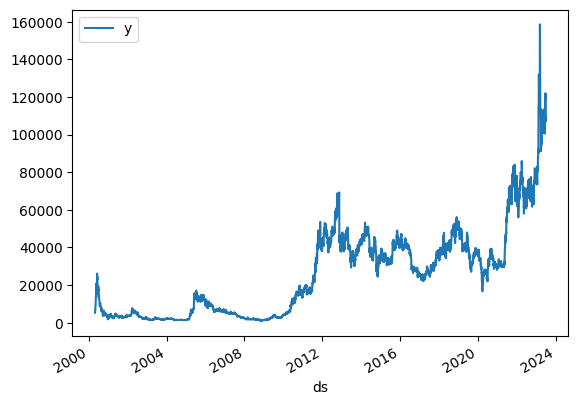

In [100]:
s_df.plot('ds')

- 우상 향하는듯해 보였지만 급격히 하락한 것을 볼 수 있다
- 2021년 초에는 코로나19 팬데믹으로 인한 경제적 불확실성과 콘서트 및 공연 취소 등의 영향으로 하락세를 보였지만 <br> 엑소, NCT의 컴백등으로 기대감이 커지면서 주가 회복을 볼 수 있다

### 예측하기

In [101]:
# train : 마지막 날짜 기준 15일을 제외한 나머지
h_train = h_df[:6655]
h_train

,index,ds,y
0,0,2020-10-15,255420
1,1,2020-10-16,198495
2,2,2020-10-19,187110
3,3,2020-10-20,180675
4,4,2020-10-21,177210
...,...,...,...
665,665,2023-06-23,301000
666,666,2023-06-26,298000
667,667,2023-06-27,292000
668,668,2023-06-28,285000


In [102]:
h_test = h_df[-15:]
h_test

,index,ds,y
655,655,2023-06-09,280500
656,656,2023-06-12,294000
657,657,2023-06-13,294000
658,658,2023-06-14,292000
659,659,2023-06-15,300500
660,660,2023-06-16,297500
661,661,2023-06-19,300500
662,662,2023-06-20,300500
663,663,2023-06-21,296500
664,664,2023-06-22,307000


In [103]:
prophet=Prophet(daily_seasonality=True,
       growth='linear')
prophet.fit(h_train)

11:50:26 - cmdstanpy - INFO - Chain [1] start processing
11:50:26 - cmdstanpy - INFO - Chain [1] done processing


In [104]:
# 얼마나 예측할 것인가?
# 30일 후를 예측

h_future=prophet.make_future_dataframe(periods=30) 
h_forecast = prophet.predict(h_future)

In [105]:
# 실제 예측한 값
h_py = h_forecast[['ds','yhat']][655:]
h_py

,ds,yhat
655,2023-06-09,276861.241610
656,2023-06-12,277577.004423
657,2023-06-13,278893.864053
658,2023-06-14,278467.353650
659,2023-06-15,279994.726465
660,2023-06-16,280023.678115
661,2023-06-19,280386.160727
662,2023-06-20,281578.750880
663,2023-06-21,281026.643857
664,2023-06-22,282428.960580


In [106]:
h_test

,index,ds,y
655,655,2023-06-09,280500
656,656,2023-06-12,294000
657,657,2023-06-13,294000
658,658,2023-06-14,292000
659,659,2023-06-15,300500
660,660,2023-06-16,297500
661,661,2023-06-19,300500
662,662,2023-06-20,300500
663,663,2023-06-21,296500
664,664,2023-06-22,307000


          ds           yhat     yhat_lower     yhat_upper
0 2020-10-15  136416.686203  107883.655843  165570.060806
1 2020-10-16  137161.907803  110455.168671  164005.689736
2 2020-10-19  139838.435868  114734.011700  166625.893387
3 2020-10-20  141882.075960  115587.706160  170031.867844
4 2020-10-21  142233.538651  113274.831566  168733.305990


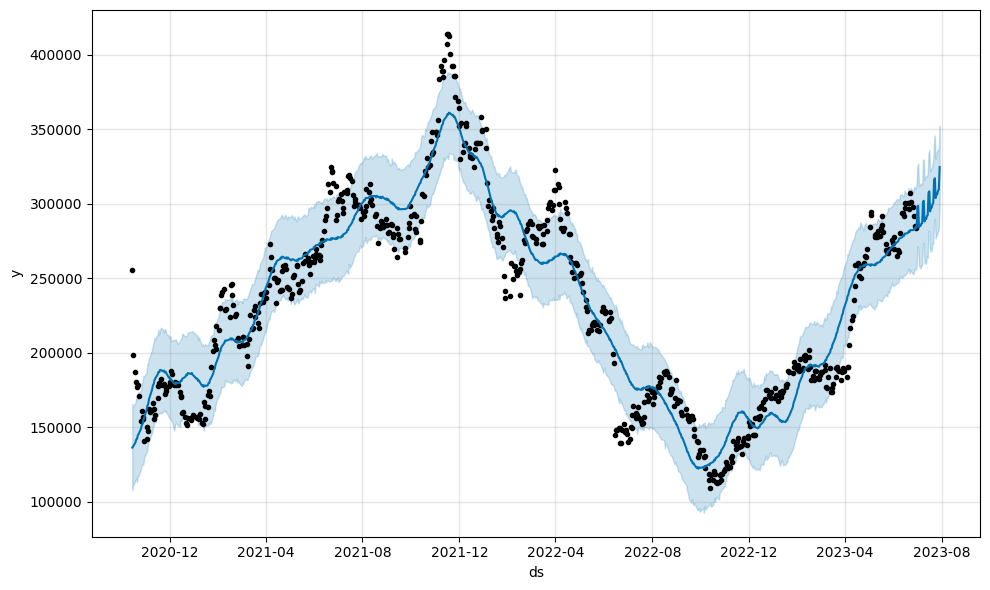

In [107]:
#forecast 시각화
print(h_forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plot을 통한 시각화 
prophet.plot(h_forecast)
plt.show()

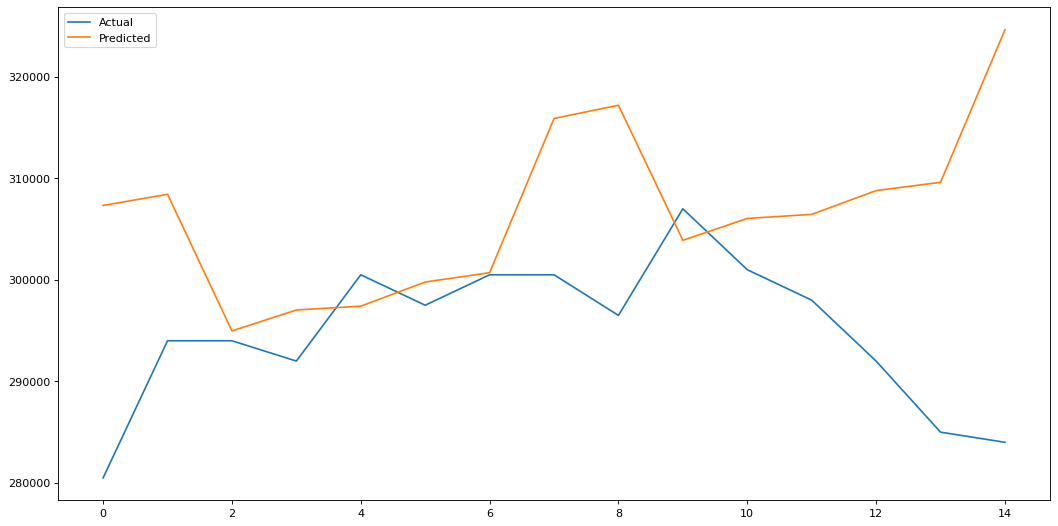

In [108]:
# plot 예측값과 실제 값을 비교 -> 트렌드 확인
from matplotlib.pyplot import figure
figure(figsize=(16,8), dpi=80)

h_py = h_forecast[['ds','yhat']][-15:] #예측값

plt.plot(h_test['y'].values, label='Actual')
plt.plot(h_py['yhat'].values, label='Predicted')
plt.legend()
plt.show()

- 예측값은 우상향을 보이지만 실제값은 예측값과 많이 차이가 나는 것을 볼 수 있다

### SM

In [109]:
s_train = s_df[:655]
s_train

,ds,y
0,2000-04-27,5325
1,2000-04-28,5961
2,2000-05-02,6677
3,2000-05-03,7471
4,2000-05-04,8366
...,...,...
650,2002-12-26,1995
651,2002-12-27,1951
652,2002-12-30,1848
653,2003-01-02,2066


In [110]:
s_test = s_df[-15:]
s_test

,ds,y
5707,2023-06-09,102000
5708,2023-06-12,104400
5709,2023-06-13,108000
5710,2023-06-14,114900
5711,2023-06-15,114800
5712,2023-06-16,117600
5713,2023-06-19,118900
5714,2023-06-20,121900
5715,2023-06-21,118800
5716,2023-06-22,114200


In [111]:
# 30일 후 예측
s_future=prophet.make_future_dataframe(periods=30) 
s_forecast = prophet.predict(s_future)

In [112]:
# 실제 예측 값

s_py = s_forecast[['ds','yhat']][655:]
s_py

,ds,yhat
655,2023-06-09,276861.241610
656,2023-06-12,277577.004423
657,2023-06-13,278893.864053
658,2023-06-14,278467.353650
659,2023-06-15,279994.726465
660,2023-06-16,280023.678115
661,2023-06-19,280386.160727
662,2023-06-20,281578.750880
663,2023-06-21,281026.643857
664,2023-06-22,282428.960580


In [113]:
s_test

,ds,y
5707,2023-06-09,102000
5708,2023-06-12,104400
5709,2023-06-13,108000
5710,2023-06-14,114900
5711,2023-06-15,114800
5712,2023-06-16,117600
5713,2023-06-19,118900
5714,2023-06-20,121900
5715,2023-06-21,118800
5716,2023-06-22,114200


          ds           yhat     yhat_lower     yhat_upper
0 2020-10-15  136416.686203  108984.095416  161027.773542
1 2020-10-16  137161.907803  111315.734514  165267.648145
2 2020-10-19  139838.435868  111899.157215  168822.549107
3 2020-10-20  141882.075960  114427.453981  169845.913951
4 2020-10-21  142233.538651  115398.375948  169746.646076


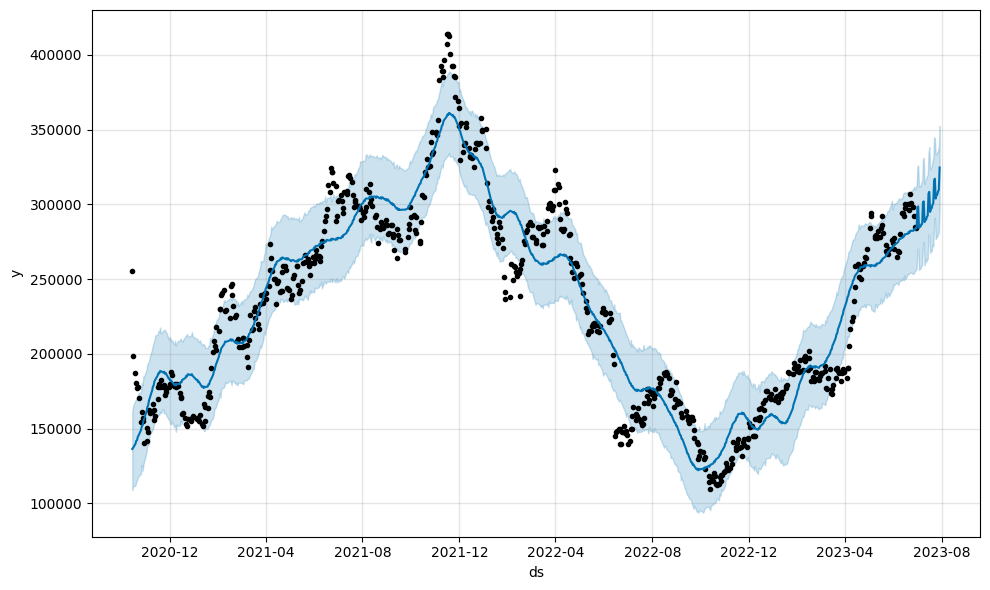

In [114]:
#forecast 시각화
print(s_forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plot을 통한 시각화 
prophet.plot(s_forecast)
plt.show()

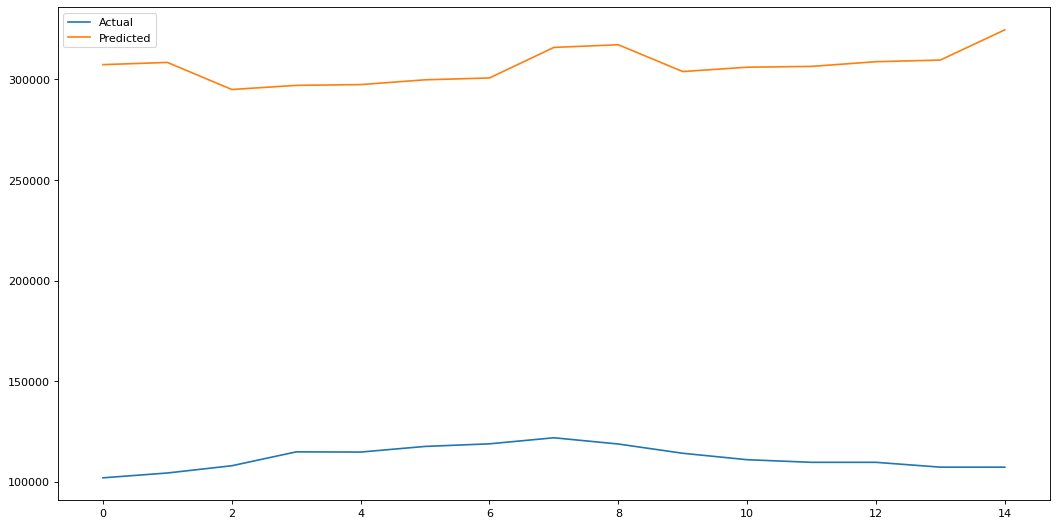

In [115]:
# plot 예측값과 실제 값을 비교 -> 트렌드 확인
from matplotlib.pyplot import figure
figure(figsize=(16,8), dpi=80)

s_py = s_forecast[['ds','yhat']][-15:] #예측값

plt.plot(s_test['y'].values, label='Actual')
plt.plot(s_py['yhat'].values, label='Predicted')
plt.legend()

- 하이브와 다르게 실제값과 예측값의 편차 폭이 크게 나는 것을 볼 수 있다